In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# load the data, use seperation as comma(,) and header as None
email_rec = pd.read_csv('/content/Spam.csv')

In [20]:
email_rec.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [21]:
# look at dimensions of the DataFrame
email_rec.shape

(4601, 58)

In [22]:
# Check data type information
email_rec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [23]:
#Check if any missing values in the dataset
email_rec.isnull().sum()

,0
word_freq_make,0
word_freq_address,0
word_freq_all,0
word_freq_3d,0
word_freq_our,0
word_freq_over,0
word_freq_remove,0
word_freq_internet,0
word_freq_order,0
word_freq_mail,0


In [24]:
email_rec['spam'].value_counts()

,count
spam,
0,2788
1,1813


In [25]:
# look at fraction of spam emails
spam_counts_series = email_rec['spam'].value_counts()
ham_count = spam_counts_series[0] # Count of non-spam emails (0)
spam_count = spam_counts_series[1] # Count of spam emails (1)

# Calculate and print the fractions
print(f"Fraction of spam emails: {(spam_count / (spam_count + ham_count))*100:.2f}")
print(f"Fraction of ham emails: {(ham_count / (spam_count + ham_count))*100:.2f}")

Fraction of spam emails: 39.40
Fraction of ham emails: 60.60


In [26]:
#  print the summary stats of all columns
email_rec.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [27]:
 #splitting data into X (having all features) and y (having target i.e spam)

X = email_rec.drop('spam', axis=1)
y = email_rec['spam']



In [28]:
# Instantiate StandardScaler
scaler = StandardScaler()

#fit and transform X
X= scaler.fit_transform(X)

In [29]:
# split into train and test with test_size as 30% and random_state as 4
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

In [30]:
# Instantiate an object of class SVC(), using cost C=1
model = SVC(C=1)

# fit model on training data
model.fit(X_train, y_train)

# predict on test data
y_pred_rbf = model.predict(X_test)

In [31]:
# import metrics
from sklearn import metrics

#print confusion_matrix
print(metrics.confusion_matrix(y_test, y_pred_rbf))



[[811  38]
 [ 61 471]]


In [32]:
# creating a KFold object with 5 splits , shuffle True and random_state=4
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# instantiating a SVC model with cost=1 and random_state=4
model = SVC(C=1, random_state=4)

In [33]:
# Computing the cross-validation scores
cv_results = cross_val_score(model, X_train, y_train, cv=folds)

In [34]:
# print 5 accuracies obtained from the 5 folds
print(cv_results)

#print mean accuracy of all 5 folds
print(np.mean(cv_results))

[0.91770186 0.94099379 0.92080745 0.93012422 0.93944099]
0.9298136645962731


In [36]:
# specify range of parameters (C) as a list ([0.1, 1, 10, 100, 1000])
params = {'C': [0.1, 1, 10, 100, 1000]}

#Intialise SVC()
model = SVC()


'''set up grid search scheme(note that we are still using the 5 fold CV scheme we set up earlier,
scoring as accuracy, verbose as 1 and return_train_score as True)'''

model_cv = GridSearchCV(estimator = model, param_grid = params, cv=folds, scoring='accuracy', verbose=1, return_train_score=True)

In [37]:
# fit the model on train data, it will fit 5 folds across all values of C
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=SVC(), param_grid={'C': [0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [38]:
#convert results of grid search CV into dataframe
cv_results = pd.DataFrame(model_cv.cv_results_)

#print cv_results
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.276256,0.061555,0.088749,0.024719,0.1,{'C': 0.1},0.895963,0.902174,0.906832,0.902174,...,0.905280,0.007795,5,0.912655,0.911879,0.912267,0.911102,0.906056,0.910792,0.002423
1,0.219372,0.024359,0.070243,0.013726,1.0,{'C': 1},0.917702,0.940994,0.920807,0.930124,...,0.929814,0.009440,2,0.951475,0.946040,0.949922,0.946040,0.945652,0.947826,0.002401
2,0.137308,0.007401,0.036398,0.006035,10.0,{'C': 10},0.908385,0.944099,0.933230,0.928571,...,0.930745,0.012368,1,0.975543,0.970885,0.973991,0.968944,0.971273,0.972127,0.002347
3,0.280467,0.068880,0.054493,0.015380,100.0,{'C': 100},0.913043,0.927019,0.936335,0.930124,...,0.928571,0.008562,3,0.989519,0.989907,0.989907,0.988354,0.987966,0.989130,0.000814
4,0.434769,0.075423,0.046337,0.009632,1000.0,{'C': 1000},0.908385,0.931677,0.922360,0.919255,...,0.920497,0.007440,4,0.996118,0.993789,0.994177,0.993789,0.994177,0.994410,0.000872


<Figure size 800x600 with 0 Axes>

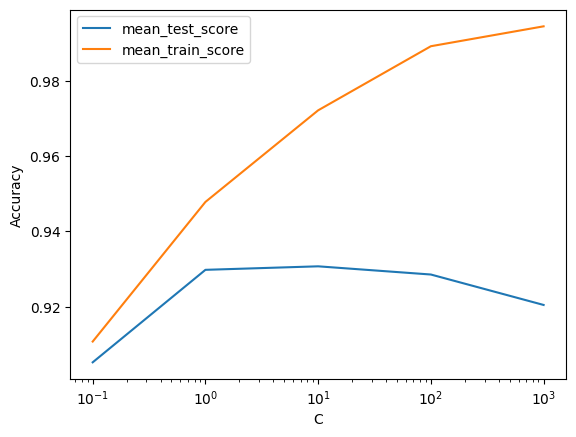

<Figure size 800x600 with 0 Axes>

In [40]:
# plot of C versus train and test scores
plot_data = cv_results.set_index('param_C')[['mean_test_score', 'mean_train_score']]
plot_data.plot(logx=True)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.figure(figsize=(8, 6))

In [41]:
#get best score for above gridearch
best_score = model_cv.best_score_


#get best c value as well
best_C = model_cv.best_params_['C']


print(" The highest test accuracy is {0} at C = {1}".format(best_score, best_C))

 The highest test accuracy is 0.9307453416149067 at C = 10


In [42]:
# model with the best value of C
model = SVC(C=best_C)

# fit model on training data
model.fit(X_train, y_train)


# predict on test data
y_pred_rbf1 = model.predict(X_test)

In [43]:
#print confusion_matrix
print(metrics.confusion_matrix(y_test, y_pred_rbf1))

[[810  39]
 [ 57 475]]


In [44]:
# accuracy
accuracy= metrics.accuracy_score(y_test, y_pred_rbf1)
print(accuracy)


# precision
precision= metrics.precision_score(y_test, y_pred_rbf1)
print(precision)


# recall/sensitivity
recall= metrics.recall_score(y_test, y_pred_rbf1)
print(recall)

0.9304851556842868
0.9241245136186771
0.8928571428571429


In [45]:
# specify params with C as list [0.1, 1, 10, 100, 1000]
params = {'C': [0.1, 1, 10, 100, 1000]}

# specify scores/metrics in an iterable i.e.['accuracy', 'precision', 'recall']
scores = ['accuracy', 'precision', 'recall']

# iterate through scores
for score in scores:
    print("# Tuning hyper-parameters for {}".format(score))

    # set up GridSearch for score metric with estimator, params, cv, scoring as scores and return_train_score=True
    clf = GridSearchCV(SVC(), params, cv=folds, scoring=score, return_train_score=True)


    # fit model on training data
    clf.fit(X_train, y_train)



    print(" The highest {0} score is {1} at C = {2}".format(score, clf.best_score_, clf.best_params_))
    print("\n")

# Tuning hyper-parameters for accuracy
 The highest accuracy score is 0.9307453416149067 at C = {'C': 10}


# Tuning hyper-parameters for precision
 The highest precision score is 0.9373311086391073 at C = {'C': 0.1}


# Tuning hyper-parameters for recall
 The highest recall score is 0.8987270122310326 at C = {'C': 10}




In [46]:
# Get list of all available kernels in SVM in a list i.e. ['Polynomial', 'RBF', 'Sigmoid','Linear']
kernels = ['Polynomial', 'RBF', 'Sigmoid','Linear']


#A function which returns the corresponding SVC model for different kernals
def getClassifier(ktype):
    if ktype == 0:
        # Polynomial kernal
        return SVC(kernel='poly', degree=8, gamma="auto")
    elif ktype == 1:
        # Radial Basis Function kernal
        return SVC(kernel='rbf', gamma="auto")
    elif ktype == 2:
        # Sigmoid kernal
        return SVC(kernel='sigmoid', gamma="auto")
    elif ktype == 3:
        # Linear kernal
        return SVC(kernel='linear', gamma="auto")

In [48]:
# import classification_report
from sklearn.metrics import classification_report


# Iterate in the range of 4
for i in range(4):

    # Use getClassifier() function for different ith value to get SVC model using different kernal
    svclassifier = getClassifier(i)

    # fit above model
    svclassifier.fit(X_train, y_train)


    # Make prediction on test data
    y_pred = svclassifier.predict(X_test)


    # Check which kernal is used as per kernels list
    # The 'if i == 0:' condition was removed to print reports for all kernels

    # Evaluate our model using classification_report
    print(f"Classification Report for {kernels[i]} Kernal")
    print(classification_report(y_test, y_pred))

Classification Report for Polynomial Kernal
              precision    recall  f1-score   support

           0       0.66      0.99      0.79       849
           1       0.91      0.20      0.33       532

    accuracy                           0.69      1381
   macro avg       0.79      0.60      0.56      1381
weighted avg       0.76      0.69      0.62      1381

Classification Report for RBF Kernal
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       849
           1       0.93      0.89      0.90       532

    accuracy                           0.93      1381
   macro avg       0.93      0.92      0.92      1381
weighted avg       0.93      0.93      0.93      1381

Classification Report for Sigmoid Kernal
              precision    recall  f1-score   support

           0       0.92      0.91      0.92       849
           1       0.86      0.87      0.86       532

    accuracy                           0.90      1381
   mac

In [50]:
# Create a dictionary param_grid for C, gamma and kernel values given below
param_grid = {'C': [0.1, 1, 10, 100, 1000]}

#Initialise GridSearchCV with SVC(), param_grid, refit=True and verbose=2 and  return_train_score=True
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, return_train_score=True)


#fit Gridsearch on X_train and y_train
grid.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ..............................................C=0.1; total time=   0.3s
[CV] END ..............................................C=0.1; total time=   0.3s
[CV] END ..............................................C=0.1; total time=   0.3s
[CV] END ..............................................C=0.1; total time=   0.3s
[CV] END ..............................................C=0.1; total time=   0.3s
[CV] END ................................................C=1; total time=   0.2s
[CV] END ................................................C=1; total time=   0.2s
[CV] END ................................................C=1; total time=   0.2s
[CV] END ................................................C=1; total time=   0.2s
[CV] END ................................................C=1; total time=   0.2s
[CV] END ...............................................C=10; total time=   0.2s
[CV] END ........................................

GridSearchCV(estimator=SVC(), param_grid={'C': [0.1, 1, 10, 100, 1000]},
             return_train_score=True, verbose=2)

In [51]:
# cv results into a dataframe
cv_results = pd.DataFrame(grid.cv_results_)

# print cv_result
cv_results


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.235384,0.014232,0.082604,0.007263,0.1,{'C': 0.1},0.914596,0.903727,0.909938,0.886646,...,0.904037,0.009491,5,0.909938,0.910714,0.912655,0.912655,0.911879,0.911568,0.001081
1,0.158747,0.008139,0.048725,0.001961,1.0,{'C': 1},0.928571,0.927019,0.940994,0.922360,...,0.928261,0.006832,2,0.948758,0.948758,0.947205,0.948370,0.949922,0.948602,0.000872
2,0.165088,0.036699,0.051206,0.012211,10.0,{'C': 10},0.942547,0.923913,0.931677,0.925466,...,0.930435,0.006617,1,0.969332,0.973991,0.968168,0.970885,0.972438,0.970963,0.002089
3,0.243061,0.050572,0.044724,0.010858,100.0,{'C': 100},0.927019,0.920807,0.930124,0.902174,...,0.922671,0.011041,3,0.989907,0.989519,0.987578,0.989907,0.990295,0.989441,0.000963
4,0.254296,0.014775,0.031940,0.001418,1000.0,{'C': 1000},0.916149,0.913043,0.919255,0.899068,...,0.914286,0.008414,4,0.993789,0.994565,0.993012,0.994953,0.994953,0.994255,0.000753


In [52]:
# get the optimal accuracy score and hyperparameters
best_score = grid.best_score_
# get the optimal hyperparameters
best_hyperparams = grid.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9304347826086955 corresponding to hyperparameters {'C': 10}


In [53]:
# model with optimal hyperparameters as obtained above
model = SVC(C=best_hyperparams['C'])

#fit model on training data
model.fit(X_train, y_train)

# predict on test data
y_pred = model.predict(X_test)

# print confusion metrics
print(metrics.confusion_matrix(y_test, y_pred))

# print accuracy
accuracy= metrics.accuracy_score(y_test, y_pred)
print(accuracy)


#print precision
precision= metrics.precision_score(y_test, y_pred)
print(precision)


#print recall/sensitivity
recall= metrics.recall_score(y_test, y_pred)
print(recall)


#print sensitivity
sensitivity= metrics.recall_score(y_test, y_pred)
print(sensitivity)




[[810  39]
 [ 57 475]]
0.9304851556842868
0.9241245136186771
0.8928571428571429
0.8928571428571429
